In [22]:
# pip install yfinance

## Importing Libraries

In [23]:
import yfinance as yf
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler


import warnings 
warnings.filterwarnings(action= 'ignore')

### Get data of following companies from Yahoo Finance using python API
**Starting from FY17**
* HDFCBANK - HDFC (Banking)
* ICICIBANK - ICICI(Banking)
* TCS - Tata Consultancy Services (IT)
* INFY - Infosys (IT)
* HINDUNILVR - Hindustan Unilever (FMCG)
* ITC - Imperial Tobacco Company of India (FMCG)
* RELIANCE - Reliance Industries (Refineries)
* LT - Larsen and Toubro (Infrastructure)
* ADANIENT - Adani Enterprises (Trading)
* BHARTIARTL - Bharti Airtel (Telecom)
* ^NSE - Nifty 50 index (enchmark index that represents the performance of the 50 largest and most liquid stocks listed on the NSE)

In [24]:
start_date = '2019-04-01'
end_date = '2024-03-31'

HDFCBANK = yf.download('HDFCBANK.NS', start=start_date, end=end_date)
ICICIBANK = yf.download('ICICIBANK.NS', start=start_date, end=end_date)
TCS = yf.download('TCS.NS', start=start_date, end=end_date)
INFY = yf.download('INFY.NS', start=start_date, end=end_date)
HINDUNILVR = yf.download('HINDUNILVR.NS', start=start_date, end=end_date)
ITC = yf.download('ITC.NS', start=start_date, end=end_date)
RELIANCE = yf.download('RELIANCE.NS', start=start_date, end=end_date)
LT = yf.download('LT.NS', start=start_date, end=end_date)
ADANIENT = yf.download('ADANIENT.NS', start=start_date, end=end_date)
BHARTIARTL = yf.download('BHARTIARTL.NS', start=start_date, end=end_date)
NSE = yf.download('^NSEI', start=start_date, end=end_date)

NSE

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-04-01,11665.200195,11738.099609,11644.750000,11669.150391,11669.150391,379600
2019-04-02,11711.549805,11729.349609,11655.849609,11713.200195,11713.200195,386100
2019-04-03,11735.299805,11761.000000,11629.150391,11643.950195,11643.950195,365800
2019-04-04,11660.200195,11662.549805,11559.200195,11598.000000,11598.000000,349000
2019-04-05,11638.400391,11689.650391,11609.500000,11665.950195,11665.950195,266700
...,...,...,...,...,...,...
2024-03-21,21989.900391,22080.949219,21941.300781,22011.949219,22011.949219,353200
2024-03-22,21932.199219,22180.699219,21883.300781,22096.750000,22096.750000,388700
2024-03-26,21947.900391,22073.199219,21947.550781,22004.699219,22004.699219,328400


### Time Series Plot

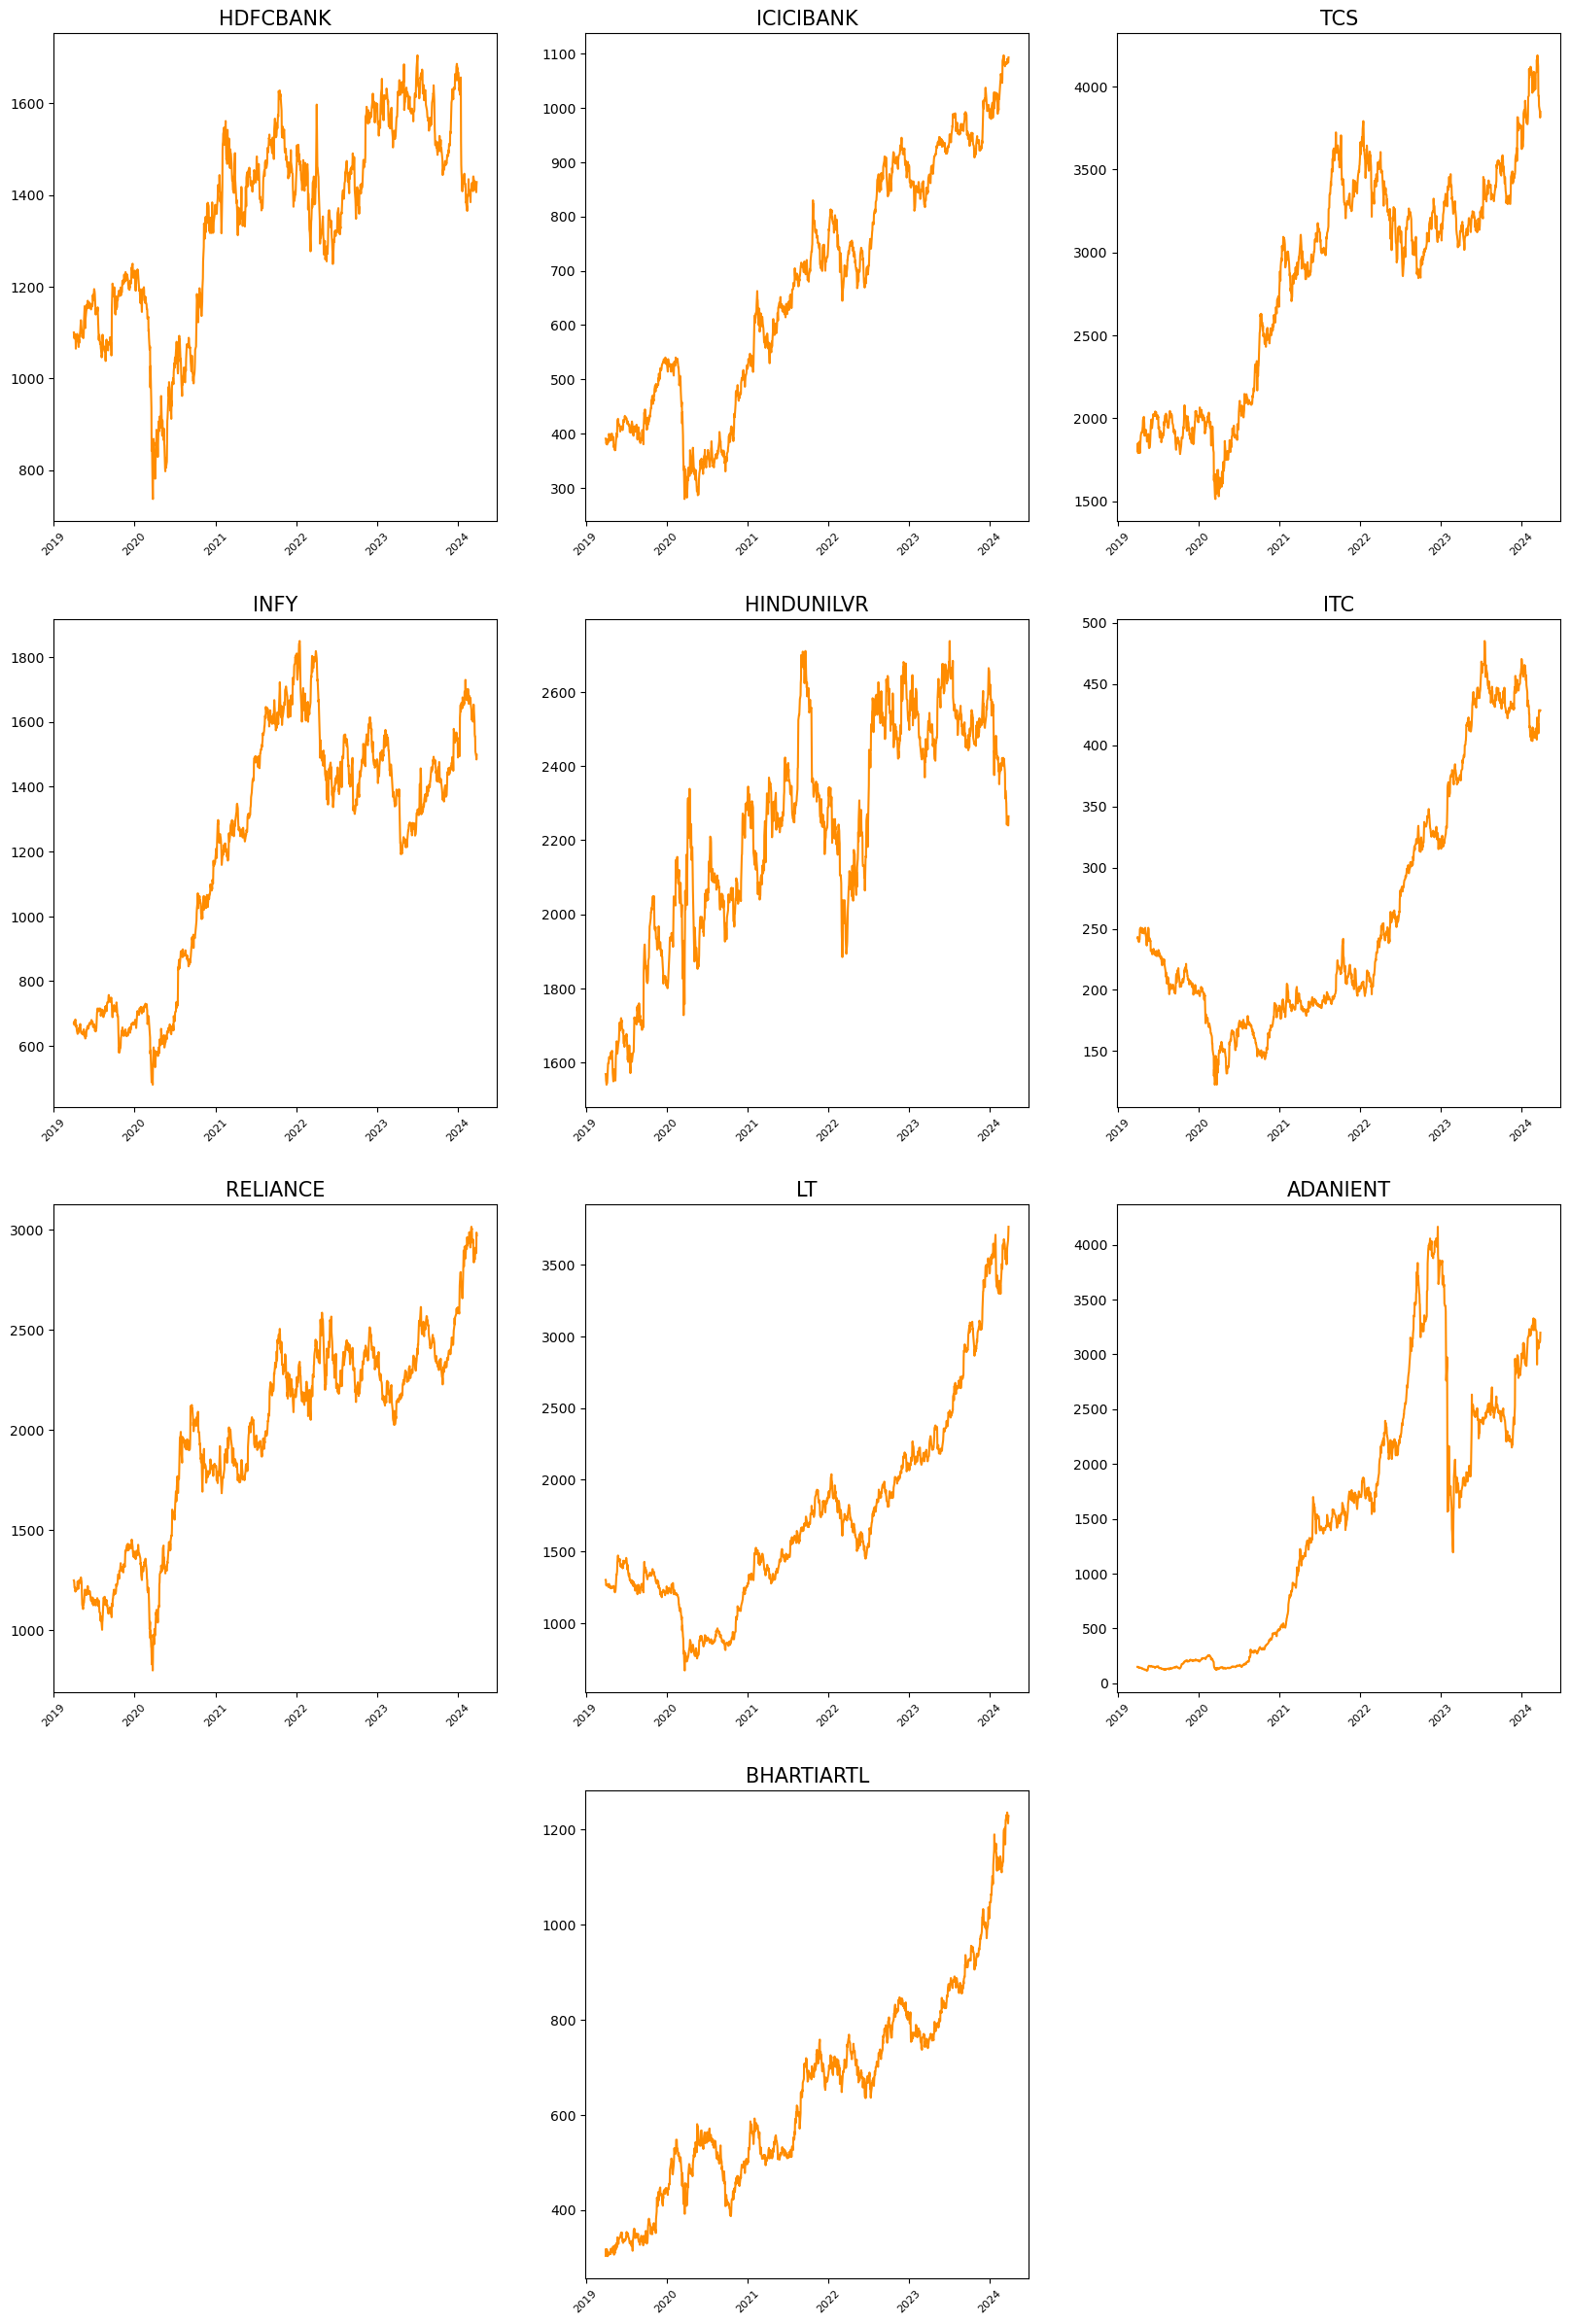

In [25]:
plt.figure(figsize=(20,30))

plt.subplot(4,3,1)
plt.plot(HDFCBANK['Adj Close'], label='HDFCBANK', color='darkorange')
plt.title('HDFCBANK', fontsize=15)
plt.xticks(fontsize=8,rotation=45)


plt.subplot(4,3,2)
plt.plot(ICICIBANK['Adj Close'], color='darkorange')
plt.title('ICICIBANK', fontsize=15)
plt.xticks(fontsize=8,rotation=45)

plt.subplot(4,3,3)
plt.plot(TCS['Adj Close'], color='darkorange')
plt.title('TCS', fontsize=15)
plt.xticks(fontsize=8,rotation=45)

plt.subplot(4,3,4)
plt.plot(INFY['Adj Close'], color='darkorange')
plt.title('INFY', fontsize=15)
plt.xticks(fontsize=8,rotation=45)

plt.subplot(4,3,5)
plt.plot(HINDUNILVR['Adj Close'], color='darkorange')
plt.title('HINDUNILVR', fontsize=15)
plt.xticks(fontsize=8,rotation=45)

plt.subplot(4,3,6)
plt.plot(ITC['Adj Close'], color='darkorange')
plt.title('ITC', fontsize=15)
plt.xticks(fontsize=8,rotation=45)

plt.subplot(4,3,7)
plt.plot(RELIANCE['Adj Close'], color='darkorange')
plt.title('RELIANCE', fontsize=15)
plt.xticks(fontsize=8,rotation=45)

plt.subplot(4,3,8)
plt.plot(LT['Adj Close'], color='darkorange')
plt.title('LT', fontsize=15)
plt.xticks(fontsize=8,rotation=45)

plt.subplot(4,3,9)
plt.plot(ADANIENT['Adj Close'], color='darkorange')
plt.title('ADANIENT', fontsize=15)
plt.xticks(fontsize=8,rotation=45)

plt.subplot(4,3,11)
plt.plot(BHARTIARTL['Adj Close'], color='darkorange')
plt.title('BHARTIARTL', fontsize=15)
plt.xticks(fontsize=8,rotation=45)

plt.show()

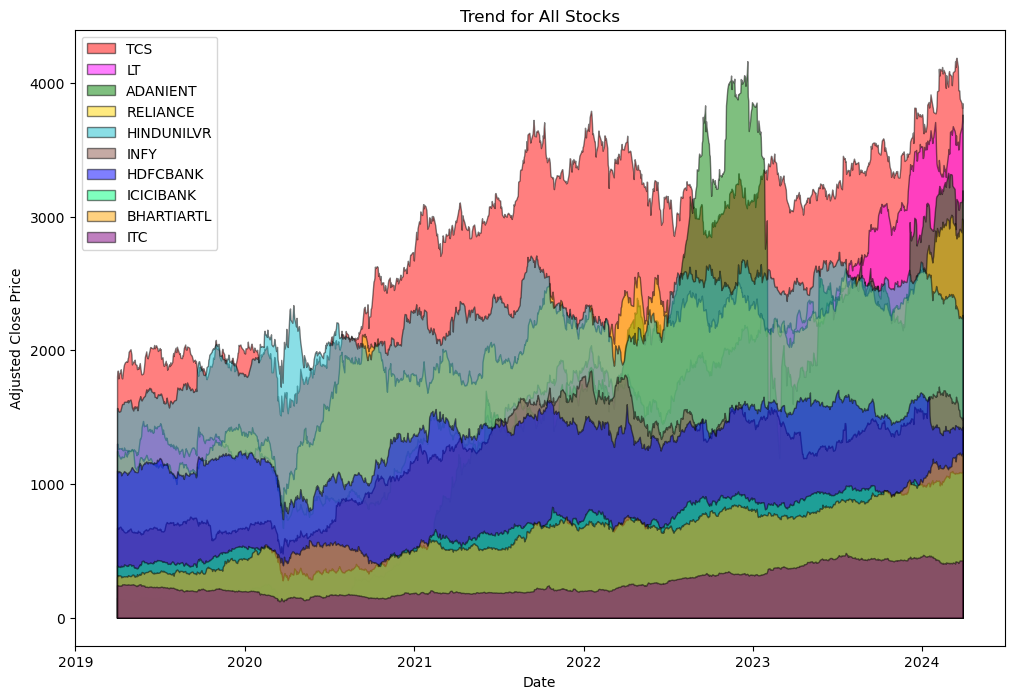

In [26]:
plt.figure(figsize=(12, 8))  

plt.fill_between(TCS.index, TCS['Adj Close'], label='TCS', alpha=0.5, color='red', edgecolor='black')
plt.fill_between(LT.index, LT['Adj Close'], label='LT', alpha=0.5, color='Magenta', edgecolor='black')
plt.fill_between(ADANIENT.index, ADANIENT['Adj Close'], label='ADANIENT', alpha=0.5, color='green', edgecolor='black')
plt.fill_between(RELIANCE.index, RELIANCE['Adj Close'], label='RELIANCE', alpha=0.5, color='gold', edgecolor='black')
plt.fill_between(HINDUNILVR.index, HINDUNILVR['Adj Close'], label='HINDUNILVR', alpha=0.5, color='#17becf', edgecolor='black')
plt.fill_between(INFY.index, INFY['Adj Close'], label='INFY', alpha=0.5, color='#8c564b', edgecolor='black')
plt.fill_between(HDFCBANK.index, HDFCBANK['Adj Close'], label='HDFCBANK', alpha=0.5, color='Blue', edgecolor='black')
plt.fill_between(ICICIBANK.index, ICICIBANK['Adj Close'], label='ICICIBANK', alpha=0.5, color='springgreen', edgecolor='black')
plt.fill_between(BHARTIARTL.index, BHARTIARTL['Adj Close'], label='BHARTIARTL', alpha=0.5, color='orange', edgecolor='black')
plt.fill_between(ITC.index, ITC['Adj Close'], label='ITC', alpha=0.5, color='purple', edgecolor='black')

plt.xlabel('Date') 
plt.ylabel('Adjusted Close Price')
plt.title('Trend for All Stocks')
plt.legend(loc='upper left')

plt.show()  

## Analyzing Market Capitalization for each Stock

### Import a file of Stock Distribution for each Company (Data from The Economic Times)

In [27]:
market_distribution = pd.read_excel('stocks distribution.xlsx')
market_distribution

,Ticker,Promoters,FII,DII,Others
0,HDFCBANK,0.00,47.83,33.320,18.84
1,ICICIBANK,0.00,44.76,45.100,10.14
2,TCS,71.77,12.70,10.600,4.93
3,INFY,14.71,34.11,35.556,15.62
4,HINDUNILVR,61.90,12.67,13.140,12.29
5,ITC,0.00,40.95,33.140,25.90
6,RELIANCE,50.31,22.06,16.960,10.66
7,LT,0.00,24.36,38.060,37.58
8,ADANIENT,72.61,14.41,5.770,7.21
9,BHARTIARTL,53.49,24.34,19.190,2.98


### Free Floated Stocks

* Free float refers to the portion of a company's shares that are available for trading in the open market, excluding shares held by insiders, controlling shareholders, and locked-in shares.
* The concept of free float is important for investors, analysts, and market participants because it provides a more accurate representation of a company's market capitalization and its liquidity. By excluding shares that are not readily available for trading, free float market capitalization reflects the true value of a company's publicly traded shares

    * **free_float_stocks** = Total_stocks - shares owned insiders, controlling shareholders or other institutions

In [28]:
market_distribution['free_float_stocks'] = np.round(market_distribution['FII'] + market_distribution['DII'] + market_distribution['Others'],1)
market_distribution

,Ticker,Promoters,FII,DII,Others,free_float_stocks
0,HDFCBANK,0.00,47.83,33.320,18.84,100.0
1,ICICIBANK,0.00,44.76,45.100,10.14,100.0
2,TCS,71.77,12.70,10.600,4.93,28.2
3,INFY,14.71,34.11,35.556,15.62,85.3
4,HINDUNILVR,61.90,12.67,13.140,12.29,38.1
5,ITC,0.00,40.95,33.140,25.90,100.0
6,RELIANCE,50.31,22.06,16.960,10.66,49.7
7,LT,0.00,24.36,38.060,37.58,100.0
8,ADANIENT,72.61,14.41,5.770,7.21,27.4
9,BHARTIARTL,53.49,24.34,19.190,2.98,46.5


In [29]:
HDFCBANK_price = HDFCBANK['Adj Close'].iloc[-1]
ICICIBANK_price = ICICIBANK['Adj Close'].iloc[-1]
TCS_price = TCS['Adj Close'].iloc[-1]
INFY_price = INFY['Adj Close'].iloc[-1]
HINDUNILVR_price = HINDUNILVR['Adj Close'].iloc[-1]
ITC_price = ITC['Adj Close'].iloc[-1]
RELIANCE_price = RELIANCE['Adj Close'].iloc[-1]
LT_price = LT['Adj Close'].iloc[-1]
ADANIENT_price = ADANIENT['Adj Close'].iloc[-1]
BHARTIARTL_price = BHARTIARTL['Adj Close'].iloc[-1]

### Calculating Capitalization using No. of Stocks and Price Data

In [30]:
price_values = [HDFCBANK_price, ICICIBANK_price, TCS_price, INFY_price, HINDUNILVR_price, ITC_price, RELIANCE_price, LT_price, ADANIENT_price, BHARTIARTL_price]

market_distribution['Price'] = price_values
market_distribution

,Ticker,Promoters,FII,DII,Others,free_float_stocks,Price
0,HDFCBANK,0.00,47.83,33.320,18.84,100.0,1428.394653
1,ICICIBANK,0.00,44.76,45.100,10.14,100.0,1093.300049
2,TCS,71.77,12.70,10.600,4.93,28.2,3848.329590
3,INFY,14.71,34.11,35.556,15.62,85.3,1498.050049
4,HINDUNILVR,61.90,12.67,13.140,12.29,38.1,2264.350098
5,ITC,0.00,40.95,33.140,25.90,100.0,428.350006
6,RELIANCE,50.31,22.06,16.960,10.66,49.7,2971.699951
7,LT,0.00,24.36,38.060,37.58,100.0,3763.899902
8,ADANIENT,72.61,14.41,5.770,7.21,27.4,3197.100098
9,BHARTIARTL,53.49,24.34,19.190,2.98,46.5,1228.599976


### Distribution of Free Float Stocks

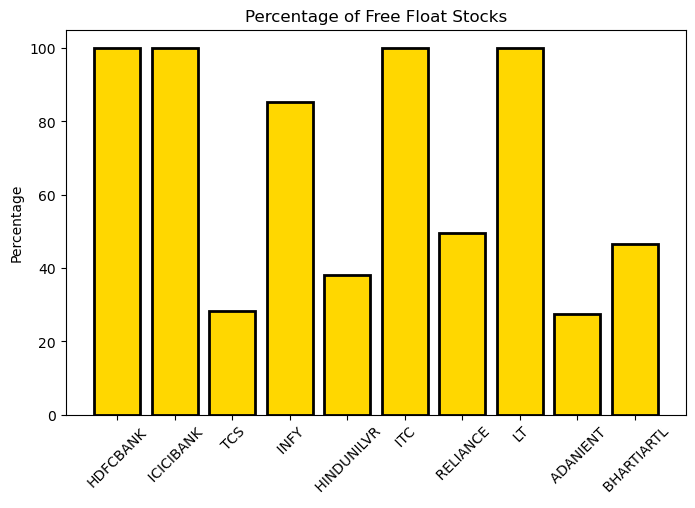

In [85]:
plt.figure(figsize=(8,5))

plt.bar(market_distribution['Ticker'], market_distribution['free_float_stocks'], color='gold', edgecolor='black', linewidth=2)
plt.xticks(fontsize=10)
plt.ylabel('Percentage', fontsize=10)
plt.title('Percentage of Free Float Stocks', fontsize=12)
plt.xticks(rotation=45)
plt.yticks(fontsize=10)

plt.show()

In [32]:
market_distribution['Total_Market_Capitalization'] = 100 * market_distribution['Price']
market_distribution['Free_Float_Market_Capitalization'] = market_distribution['free_float_stocks'] * market_distribution['Price']
market_distribution

,Ticker,Promoters,FII,DII,Others,free_float_stocks,Price,Total_Market_Capitalization,Free_Float_Market_Capitalization
0,HDFCBANK,0.00,47.83,33.320,18.84,100.0,1428.394653,142839.465332,142839.465332
1,ICICIBANK,0.00,44.76,45.100,10.14,100.0,1093.300049,109330.004883,109330.004883
2,TCS,71.77,12.70,10.600,4.93,28.2,3848.329590,384832.958984,108522.894434
3,INFY,14.71,34.11,35.556,15.62,85.3,1498.050049,149805.004883,127783.669165
4,HINDUNILVR,61.90,12.67,13.140,12.29,38.1,2264.350098,226435.009766,86271.738721
5,ITC,0.00,40.95,33.140,25.90,100.0,428.350006,42835.000610,42835.000610
6,RELIANCE,50.31,22.06,16.960,10.66,49.7,2971.699951,297169.995117,147693.487573
7,LT,0.00,24.36,38.060,37.58,100.0,3763.899902,376389.990234,376389.990234
8,ADANIENT,72.61,14.41,5.770,7.21,27.4,3197.100098,319710.009766,87600.542676
9,BHARTIARTL,53.49,24.34,19.190,2.98,46.5,1228.599976,122859.997559,57129.898865


### Market Capitalization Plot

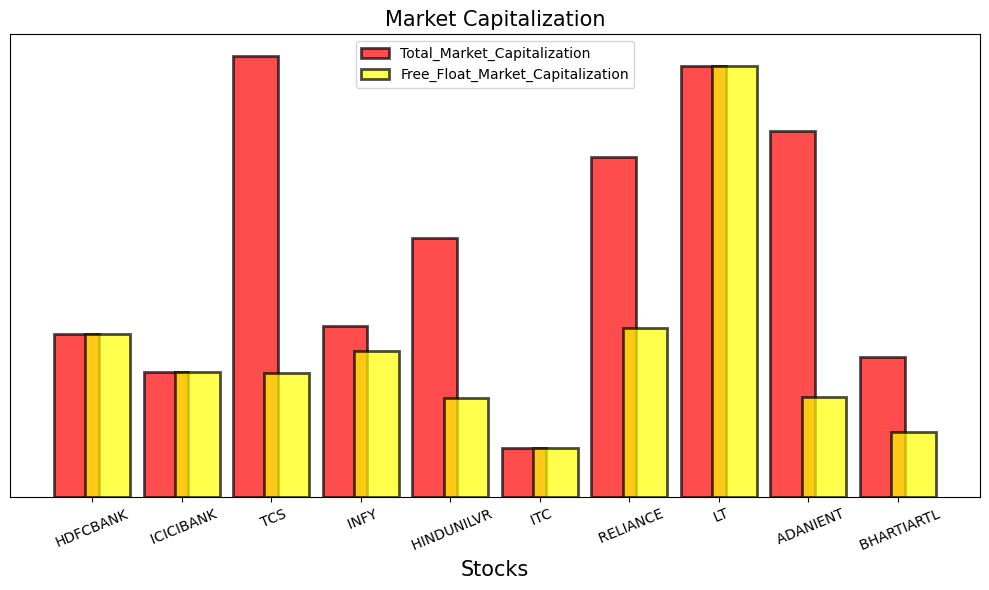

In [33]:
categories = market_distribution['Ticker']
values1 = market_distribution['Total_Market_Capitalization']
values2 = market_distribution['Free_Float_Market_Capitalization']

bar_width = 0.35

x = np.arange(len(categories))

fig, ax = plt.subplots(figsize=(10, 6))  # Adjust the figure size as needed

bars1 = ax.bar(x, values1,  color='red', alpha=0.7, edgecolor='black', linewidth=2, width=0.5, label='Total_Market_Capitalization')

bars2 = ax.bar(x + bar_width, values2, color='yellow', alpha=0.7, edgecolor='black', linewidth=2, width=0.5, label='Free_Float_Market_Capitalization')

plt.title('Market Capitalization', fontsize=15)
plt.xlabel('Stocks', fontsize=15)
plt.xticks(fontsize=10, rotation=22.5)
plt.yticks([])

ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(categories)
ax.legend(fontsize=10)

plt.tight_layout()

plt.show()

In [34]:
dataframes = [HDFCBANK, ICICIBANK, TCS, INFY, HINDUNILVR, ITC, RELIANCE, LT, ADANIENT, BHARTIARTL]

selected_columns = [df.loc[:, 'Adj Close'] for df in dataframes]

close_price = pd.concat(selected_columns, axis=1)
close_price.columns = ['HDFCBANK', 'ICICIBANK', 'TCS', 'INFY', 'HINDUNILVR', 'ITC', 'RELIANCE', 'LT', 'ADANIENT', 'BHARTIARTL'] 

close_price.tail()

,HDFCBANK,ICICIBANK,TCS,INFY,HINDUNILVR,ITC,RELIANCE,LT,ADANIENT,BHARTIARTL
Date,,,,,,,,,,
2024-03-21,1426.273560,1081.800049,3944.282227,1554.699951,2242.350098,421.250000,2901.949951,3560.000000,3066.500000,1220.800049
2024-03-22,1423.412598,1090.300049,3882.679932,1508.849976,2256.550049,428.600006,2910.050049,3617.800049,3107.699951,1236.099976
2024-03-26,1406.197754,1083.699951,3849.520996,1492.650024,2240.000000,427.649994,2883.149902,3670.100098,3109.949951,1213.099976
2024-03-27,1421.291626,1083.750000,3813.185059,1483.849976,2239.699951,428.000000,2985.699951,3706.399902,3122.100098,1224.800049
2024-03-28,1428.394653,1093.300049,3848.329590,1498.050049,2264.350098,428.350006,2971.699951,3763.899902,3197.100098,1228.599976


In [35]:
new_columns = [col + '_change%' for col in close_price.columns]
index_price = close_price.pct_change()
index_price.columns = new_columns

index_price.drop(index_price.index[0], inplace=True)
index_price.reset_index(inplace=True, drop=True)
index_price

,HDFCBANK_change%,ICICIBANK_change%,TCS_change%,INFY_change%,HINDUNILVR_change%,ITC_change%,RELIANCE_change%,LT_change%,ADANIENT_change%,BHARTIARTL_change%
0,-0.007332,-0.002762,0.023454,0.005695,-0.001686,0.002187,-0.001545,-0.001735,0.001320,0.045921
1,-0.000915,-0.012716,0.000000,-0.008033,-0.009691,-0.005874,-0.010434,-0.022486,-0.027036,-0.018095
2,-0.003838,-0.008544,-0.031164,-0.007168,-0.002544,-0.004559,-0.016107,-0.006785,-0.000339,0.019429
3,0.009479,0.004630,0.016778,0.015243,-0.004470,-0.000848,0.000628,0.003726,-0.004068,-0.000420
4,-0.007026,-0.008834,0.010960,0.010470,0.003496,-0.006111,-0.018207,-0.000109,-0.033696,-0.004767
...,...,...,...,...,...,...,...,...,...,...
1229,0.010272,-0.002490,0.000516,-0.000161,0.000178,0.013351,0.005004,0.014332,0.004932,-0.008930
1230,-0.002006,0.007857,-0.015618,-0.029491,0.006333,0.017448,0.002791,0.016236,0.013435,0.012533
1231,-0.012094,-0.006053,-0.008540,-0.010737,-0.007334,-0.002217,-0.009244,0.014456,0.000724,-0.018607
1232,0.010734,0.000046,-0.009439,-0.005896,-0.000134,0.000818,0.035569,0.009891,0.003907,0.009645


## Portfolio Index

#### A portfolio index, often referred to as a market index or stock index, is a weighted average of several stock prices designed to reflect the overall performance of a group of stocks.
#### These indices are composed of a basket of stocks from different sectors and are widely used as barometers for the overall health of the stock market.







#### $$ Index Price = Prev Day Value * (1 + \sum_{i=1}^{n} change_i \times weight_i) $$

* Change is Precentage change from previous day for the respective stocks.
* Weight is accoring to Free Float Market Capitalization

In [36]:
total_free_float = np.sum(market_distribution['Free_Float_Market_Capitalization'])

HDFCBANK_weight = market_distribution['Free_Float_Market_Capitalization'][0] / total_free_float
ICICIBANK_weight = market_distribution['Free_Float_Market_Capitalization'][1] / total_free_float
TCS_weight = market_distribution['Free_Float_Market_Capitalization'][2] / total_free_float
INFY_weight = market_distribution['Free_Float_Market_Capitalization'][3] / total_free_float
HINDUNILVR_weight = market_distribution['Free_Float_Market_Capitalization'][4] / total_free_float
ITC_weight = market_distribution['Free_Float_Market_Capitalization'][5] / total_free_float
RELIANCE_weight = market_distribution['Free_Float_Market_Capitalization'][6] / total_free_float
LT_weight = market_distribution['Free_Float_Market_Capitalization'][7] / total_free_float
ADANIENT_weight = market_distribution['Free_Float_Market_Capitalization'][8] / total_free_float
BHARTIARTL_weight = market_distribution['Free_Float_Market_Capitalization'][9] / total_free_float

market_capitalization_weights = [ HDFCBANK_weight, ICICIBANK_weight, TCS_weight, INFY_weight, 
                                 HINDUNILVR_weight, ITC_weight, RELIANCE_weight, LT_weight, 
                                 ADANIENT_weight, BHARTIARTL_weight]

In [37]:
initial_index_value = 1000

index_values = [initial_index_value]

for i in range(1, len(index_price)):
    prev_index_value = index_values[-1]
    
    weighted_changes =  (
                          index_price.loc[i, 'HDFCBANK_change%'] * HDFCBANK_weight +
                          index_price.loc[i, 'ICICIBANK_change%'] * ICICIBANK_weight +
                          index_price.loc[i, 'TCS_change%'] * TCS_weight +
                          index_price.loc[i, 'INFY_change%'] * INFY_weight +
                          index_price.loc[i, 'HINDUNILVR_change%'] * HINDUNILVR_weight +
                          index_price.loc[i, 'ITC_change%'] * ITC_weight +
                          index_price.loc[i, 'RELIANCE_change%'] * RELIANCE_weight +
                          index_price.loc[i, 'LT_change%'] * LT_weight +
                          index_price.loc[i, 'ADANIENT_change%'] * ADANIENT_weight +
                          index_price.loc[i, 'BHARTIARTL_change%'] * BHARTIARTL_weight
                        )

    index_value = prev_index_value * (1 + weighted_changes)
    index_values.append(index_value)

index_price['Index'] = index_values
index_price.head()

,HDFCBANK_change%,ICICIBANK_change%,TCS_change%,INFY_change%,HINDUNILVR_change%,ITC_change%,RELIANCE_change%,LT_change%,ADANIENT_change%,BHARTIARTL_change%,Index
0,-0.007332,-0.002762,0.023454,0.005695,-0.001686,0.002187,-0.001545,-0.001735,0.001320,0.045921,1000.000000
1,-0.000915,-0.012716,0.000000,-0.008033,-0.009691,-0.005874,-0.010434,-0.022486,-0.027036,-0.018095,986.752254
2,-0.003838,-0.008544,-0.031164,-0.007168,-0.002544,-0.004559,-0.016107,-0.006785,-0.000339,0.019429,979.045168
3,0.009479,0.004630,0.016778,0.015243,-0.004470,-0.000848,0.000628,0.003726,-0.004068,-0.000420,983.856493
4,-0.007026,-0.008834,0.010960,0.010470,0.003496,-0.006111,-0.018207,-0.000109,-0.033696,-0.004767,979.759773


In [39]:
index_price['Date'] = TCS.index[1:]
index_price['Date'] = pd.to_datetime(index_price['Date'])
index_price.set_index('Date', inplace=True)
index_price

,HDFCBANK_change%,ICICIBANK_change%,TCS_change%,INFY_change%,HINDUNILVR_change%,ITC_change%,RELIANCE_change%,LT_change%,ADANIENT_change%,BHARTIARTL_change%,Index
Date,,,,,,,,,,,
2019-04-02,-0.007332,-0.002762,0.023454,0.005695,-0.001686,0.002187,-0.001545,-0.001735,0.001320,0.045921,1000.000000
2019-04-03,-0.000915,-0.012716,0.000000,-0.008033,-0.009691,-0.005874,-0.010434,-0.022486,-0.027036,-0.018095,986.752254
2019-04-04,-0.003838,-0.008544,-0.031164,-0.007168,-0.002544,-0.004559,-0.016107,-0.006785,-0.000339,0.019429,979.045168
2019-04-05,0.009479,0.004630,0.016778,0.015243,-0.004470,-0.000848,0.000628,0.003726,-0.004068,-0.000420,983.856493
2019-04-08,-0.007026,-0.008834,0.010960,0.010470,0.003496,-0.006111,-0.018207,-0.000109,-0.033696,-0.004767,979.759773
...,...,...,...,...,...,...,...,...,...,...,...
2024-03-21,0.010272,-0.002490,0.000516,-0.000161,0.000178,0.013351,0.005004,0.014332,0.004932,-0.008930,2993.413524
2024-03-22,-0.002006,0.007857,-0.015618,-0.029491,0.006333,0.017448,0.002791,0.016236,0.013435,0.012533,3004.627373
2024-03-26,-0.012094,-0.006053,-0.008540,-0.010737,-0.007334,-0.002217,-0.009244,0.014456,0.000724,-0.018607,2999.163187


([], [])

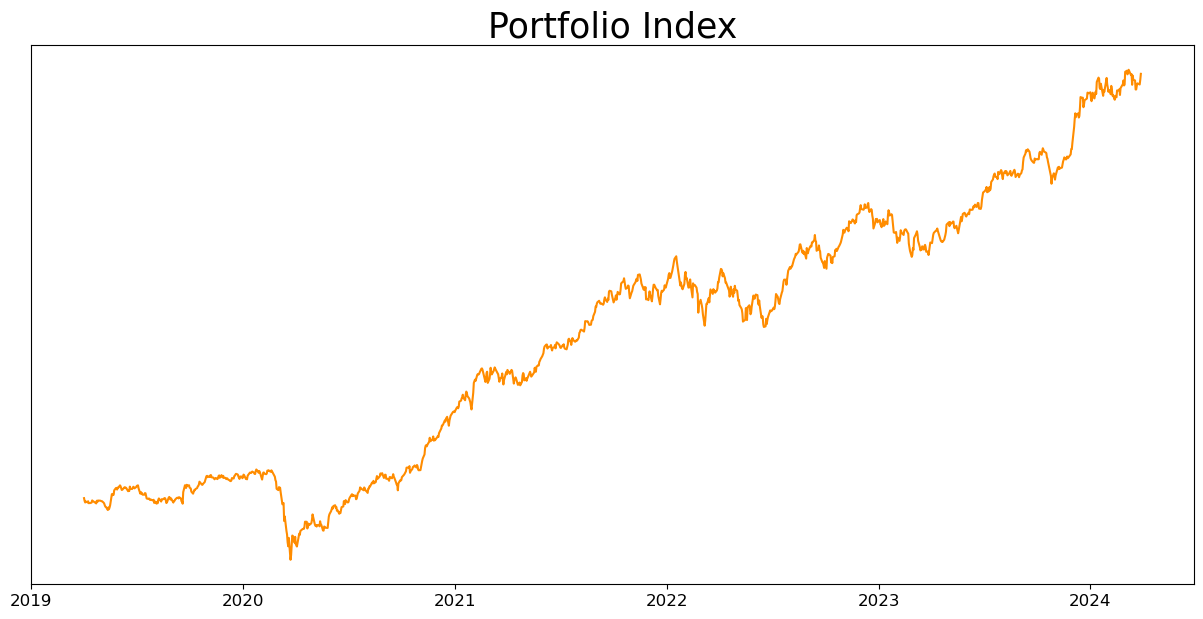

In [40]:
plt.figure(figsize=(15,7))

plt.plot(index_price['Index'], color='darkorange')
plt.title('Portfolio Index', fontsize=25)
plt.xticks(fontsize=12)
plt.yticks([])

## Risk Management
**It is the process of monitoring and dealing with the financial risks associated with investing. Risk is inseparable from return in the investment world.
One of the tactics to ascertain risk is standard deviation (can understand like Volatility of a stock), which is a statistical measure of dispersion around a central tendency.**

**Investment Risk:** It is the deviation from an expected outcome. This deviation is expressed in absolute terms or relative to something else like a market benchmark.

### Most common risk management techniques.
* **Avoidance:** This means choosing the safest assets with little to no risks.
* **Sharing:** This technique comes with two or more parties taking on an agreed-upon portion of the risk. For instance, **reinsurers** cover risks that insurance companies can't handle on their own.
* **Transferring:** Risks can be passed on from one party to another. For instance, health insurance involves passing on the risk of coverage from you to your insurer as long as you keep up with your premiums.
* **Loss Prevention and Reduction:** Rather than eliminate the potential for risk, this strategy means that you find ways to minimize your losses by preventing them from spreading to other areas. **Diversification** may be a way for investors to reduce their losses.


### Metrics Used for assessing Investment Risk: 
* **BETA:** Beta measures the sensitivity of a stock's returns to changes in the market returns. It indicates how volatile a stock is compared to the overall market.
* **TREYNOR RATIO:** The Treynor ratio measures the risk-adjusted return of an investment by comparing its excess return over the risk-free rate per unit of systematic risk (beta). A higher Treynor ratio indicates better risk-adjusted performance.
* **SHARPE RATIO:** Sharpe ratio evaluate the performance of an investment or a portfolio relative to its risk. It quantifies the excess return of an investment over the risk-free rate per unit of risk (standard deviation of returns)
* **ALPHA:** Alpha measures the excess return of an investment over its expected return, given its beta and the market return. It indicates how well an investment has performed relative to its risk.

In [41]:
HDFCBANK['Return']   =  HDFCBANK['Adj Close'].pct_change().dropna()*100
ICICIBANK['Return']  =  ICICIBANK['Adj Close'].pct_change().dropna()*100
TCS['Return']        =  TCS['Adj Close'].pct_change().dropna()*100
INFY['Return']       =  INFY['Adj Close'].pct_change().dropna()*100
HINDUNILVR['Return'] =  HINDUNILVR['Adj Close'].pct_change().dropna()*100
ITC['Return']        =  ITC['Adj Close'].pct_change().dropna()*100
RELIANCE['Return']   =  RELIANCE['Adj Close'].pct_change().dropna()*100
LT['Return']         =  LT['Adj Close'].pct_change().dropna()*100
ADANIENT['Return']   =  ADANIENT['Adj Close'].pct_change().dropna()*100
BHARTIARTL['Return'] =  BHARTIARTL['Adj Close'].pct_change().dropna()*100
NSE['Return']        =  NSE['Adj Close'].pct_change().dropna()*100

In [42]:
risk_free_rate = 0.05        

In [43]:
NSE_mean_return = NSE['Return'].mean()
NSE_var = NSE['Return'].var()
NSE_std_dev = NSE['Return'].std()

print('Avg_return:' , NSE_mean_return)
print('Variance:' , NSE_var)
print('Std Dev:' , NSE_std_dev)

Avg_return: 0.06002654572738841
Variance: 1.4547145517991633
Std Dev: 1.2061154802916523


In [44]:
def calculate_metrics(stock_data, market_data, risk_free_rate):
    mean_return = stock_data['Return'].mean()
    std_dev = stock_data['Return'].std()
    cov = stock_data['Return'].cov(market_data['Return'])
    beta = cov / market_data['Return'].var()
    sharpe_ratio = (mean_return - risk_free_rate) / std_dev
    treynor_ratio = (mean_return - risk_free_rate) / beta
    alpha = mean_return - (risk_free_rate + beta * (market_data['Return'].mean() - risk_free_rate))
    return mean_return, std_dev, cov, beta, sharpe_ratio, treynor_ratio, alpha

In [45]:
HDFCBANK_mean_return, HDFCBANK_std_dev, HDFCBANK_cov, HDFCBANK_beta, HDFCBANK_sharpe_ratio, HDFCBANK_treynor_ratio, HDFCBANK_alpha = calculate_metrics(HDFCBANK, NSE, risk_free_rate)

ICICIBANK_mean_return, ICICIBANK_std_dev, ICICIBANK_cov, ICICIBANK_beta, ICICIBANK_sharpe_ratio, ICICIBANK_treynor_ratio, ICICIBANK_alpha = calculate_metrics(ICICIBANK, NSE, risk_free_rate)

TCS_mean_return, TCS_std_dev, TCS_cov, TCS_beta, TCS_sharpe_ratio, TCS_treynor_ratio, TCS_alpha = calculate_metrics(TCS, NSE, risk_free_rate)

INFY_mean_return, INFY_std_dev, INFY_cov, INFY_beta, INFY_sharpe_ratio, INFY_treynor_ratio, INFY_alpha = calculate_metrics(INFY, NSE, risk_free_rate)

HINDUNILVR_mean_return, HINDUNILVR_std_dev, HINDUNILVR_cov, HINDUNILVR_beta, HINDUNILVR_sharpe_ratio, HINDUNILVR_treynor_ratio, HINDUNILVR_alpha = calculate_metrics(HINDUNILVR, NSE, risk_free_rate)

ITC_mean_return, ITC_std_dev, ITC_cov, ITC_beta, ITC_sharpe_ratio, ITC_treynor_ratio, ITC_alpha = calculate_metrics(ITC, NSE, risk_free_rate)

RELIANCE_mean_return, RELIANCE_std_dev, RELIANCE_cov, RELIANCE_beta, RELIANCE_sharpe_ratio, RELIANCE_treynor_ratio, RELIANCE_alpha = calculate_metrics(RELIANCE, NSE, risk_free_rate)

LT_mean_return, LT_std_dev, LT_cov, LT_beta, LT_sharpe_ratio, LT_treynor_ratio, LT_alpha = calculate_metrics(LT, NSE, risk_free_rate)

ADANIENT_mean_return, ADANIENT_std_dev, ADANIENT_cov, ADANIENT_beta, ADANIENT_sharpe_ratio, ADANIENT_treynor_ratio, ADANIENT_alpha = calculate_metrics(ADANIENT, NSE, risk_free_rate)

BHARTIARTL_mean_return, BHARTIARTL_std_dev, BHARTIARTL_cov, BHARTIARTL_beta, BHARTIARTL_sharpe_ratio, BHARTIARTL_treynor_ratio, BHARTIARTL_alpha = calculate_metrics(BHARTIARTL, NSE, risk_free_rate)

In [46]:
return_data = pd.Series([HDFCBANK_mean_return, ICICIBANK_mean_return, TCS_mean_return, INFY_mean_return, HINDUNILVR_mean_return, 
                      ITC_mean_return, RELIANCE_mean_return, LT_mean_return, ADANIENT_mean_return, BHARTIARTL_mean_return], 
                     index=['HDFCBANK', 'ICICIBANK', 'TCS', 'INFY', 'HINDUNILVR', 
                            'ITC', 'RELIANCE', 'LT', 'ADANIENT', 'BHARTIARTL']).sort_values(ascending=False)

In [47]:
std_dev_data = pd.Series([HDFCBANK_std_dev, ICICIBANK_std_dev, TCS_std_dev, INFY_std_dev, HINDUNILVR_std_dev, 
                      ITC_std_dev, RELIANCE_std_dev, LT_std_dev, ADANIENT_std_dev, BHARTIARTL_std_dev], 
                     index=['HDFCBANK', 'ICICIBANK', 'TCS', 'INFY', 'HINDUNILVR', 
                            'ITC', 'RELIANCE', 'LT', 'ADANIENT', 'BHARTIARTL']).sort_values(ascending=False)

In [48]:
beta_data = pd.Series([HDFCBANK_beta, ICICIBANK_beta, TCS_beta, INFY_beta, HINDUNILVR_beta, 
                      ITC_beta, RELIANCE_beta, LT_beta, ADANIENT_beta, BHARTIARTL_beta], 
                     index=['HDFCBANK', 'ICICIBANK', 'TCS', 'INFY', 'HINDUNILVR', 
                            'ITC', 'RELIANCE', 'LT', 'ADANIENT', 'BHARTIARTL']).sort_values(ascending=False)

In [49]:
treynor_ratio_data = pd.Series([HDFCBANK_treynor_ratio, ICICIBANK_treynor_ratio, TCS_treynor_ratio, INFY_treynor_ratio, HINDUNILVR_treynor_ratio, 
                      ITC_treynor_ratio, RELIANCE_treynor_ratio, LT_treynor_ratio, ADANIENT_treynor_ratio, BHARTIARTL_treynor_ratio], 
                     index=['HDFCBANK', 'ICICIBANK', 'TCS', 'INFY', 'HINDUNILVR', 
                            'ITC', 'RELIANCE', 'LT', 'ADANIENT', 'BHARTIARTL']).sort_values(ascending=False)

In [50]:
sharpe_ratio_data = pd.Series([HDFCBANK_sharpe_ratio, ICICIBANK_sharpe_ratio, TCS_sharpe_ratio, INFY_sharpe_ratio, HINDUNILVR_sharpe_ratio, 
                      ITC_sharpe_ratio, RELIANCE_sharpe_ratio, LT_sharpe_ratio, ADANIENT_sharpe_ratio, BHARTIARTL_sharpe_ratio], 
                     index=['HDFCBANK', 'ICICIBANK', 'TCS', 'INFY', 'HINDUNILVR', 
                            'ITC', 'RELIANCE', 'LT', 'ADANIENT', 'BHARTIARTL']).sort_values(ascending=False)

In [51]:
alpha_data = pd.Series([HDFCBANK_alpha, ICICIBANK_alpha, TCS_alpha, INFY_alpha, HINDUNILVR_alpha, 
                      ITC_alpha, RELIANCE_alpha, LT_alpha, ADANIENT_alpha, BHARTIARTL_alpha], 
                     index=['HDFCBANK', 'ICICIBANK', 'TCS', 'INFY', 'HINDUNILVR', 
                            'ITC', 'RELIANCE', 'LT', 'ADANIENT', 'BHARTIARTL']).sort_values(ascending=False)

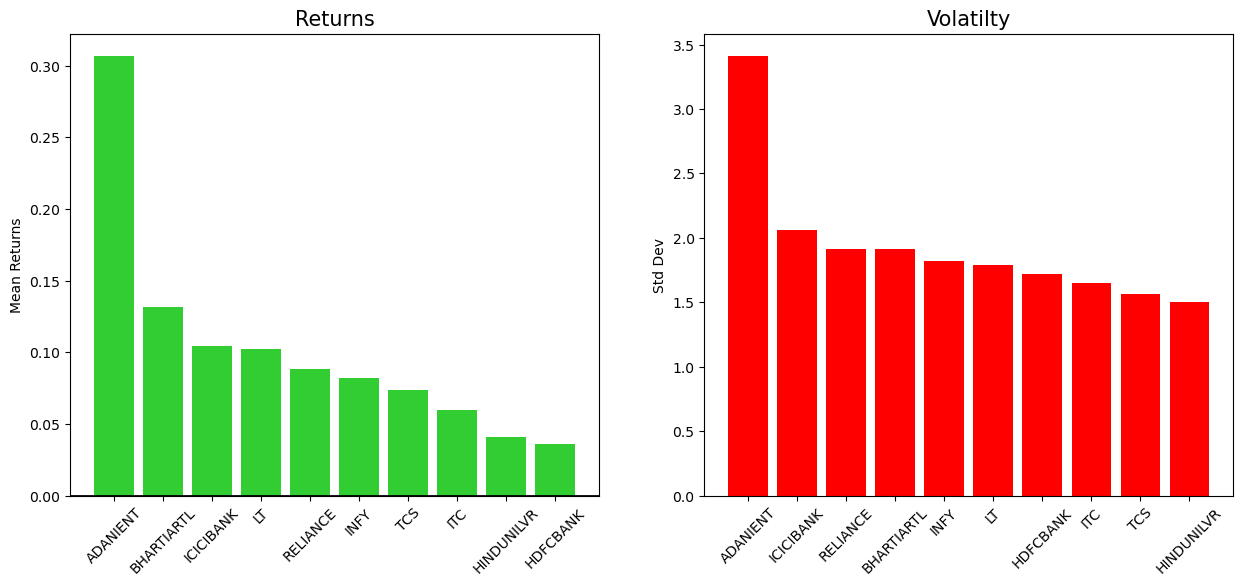

In [52]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.bar(return_data.index, return_data, color='limegreen')
plt.axhline(y=0, color='black', linestyle='-', linewidth=2)
plt.xticks(fontsize=10)
plt.ylabel('Mean Returns')
plt.title('Returns', fontsize=15)
plt.xticks(rotation=45)

plt.subplot(1,2,2)
plt.bar(std_dev_data.index, std_dev_data, color='red')
plt.xticks(fontsize=10)
plt.ylabel('Std Dev')
plt.title('Volatilty', fontsize=15)
plt.xticks(rotation=45)

plt.show()

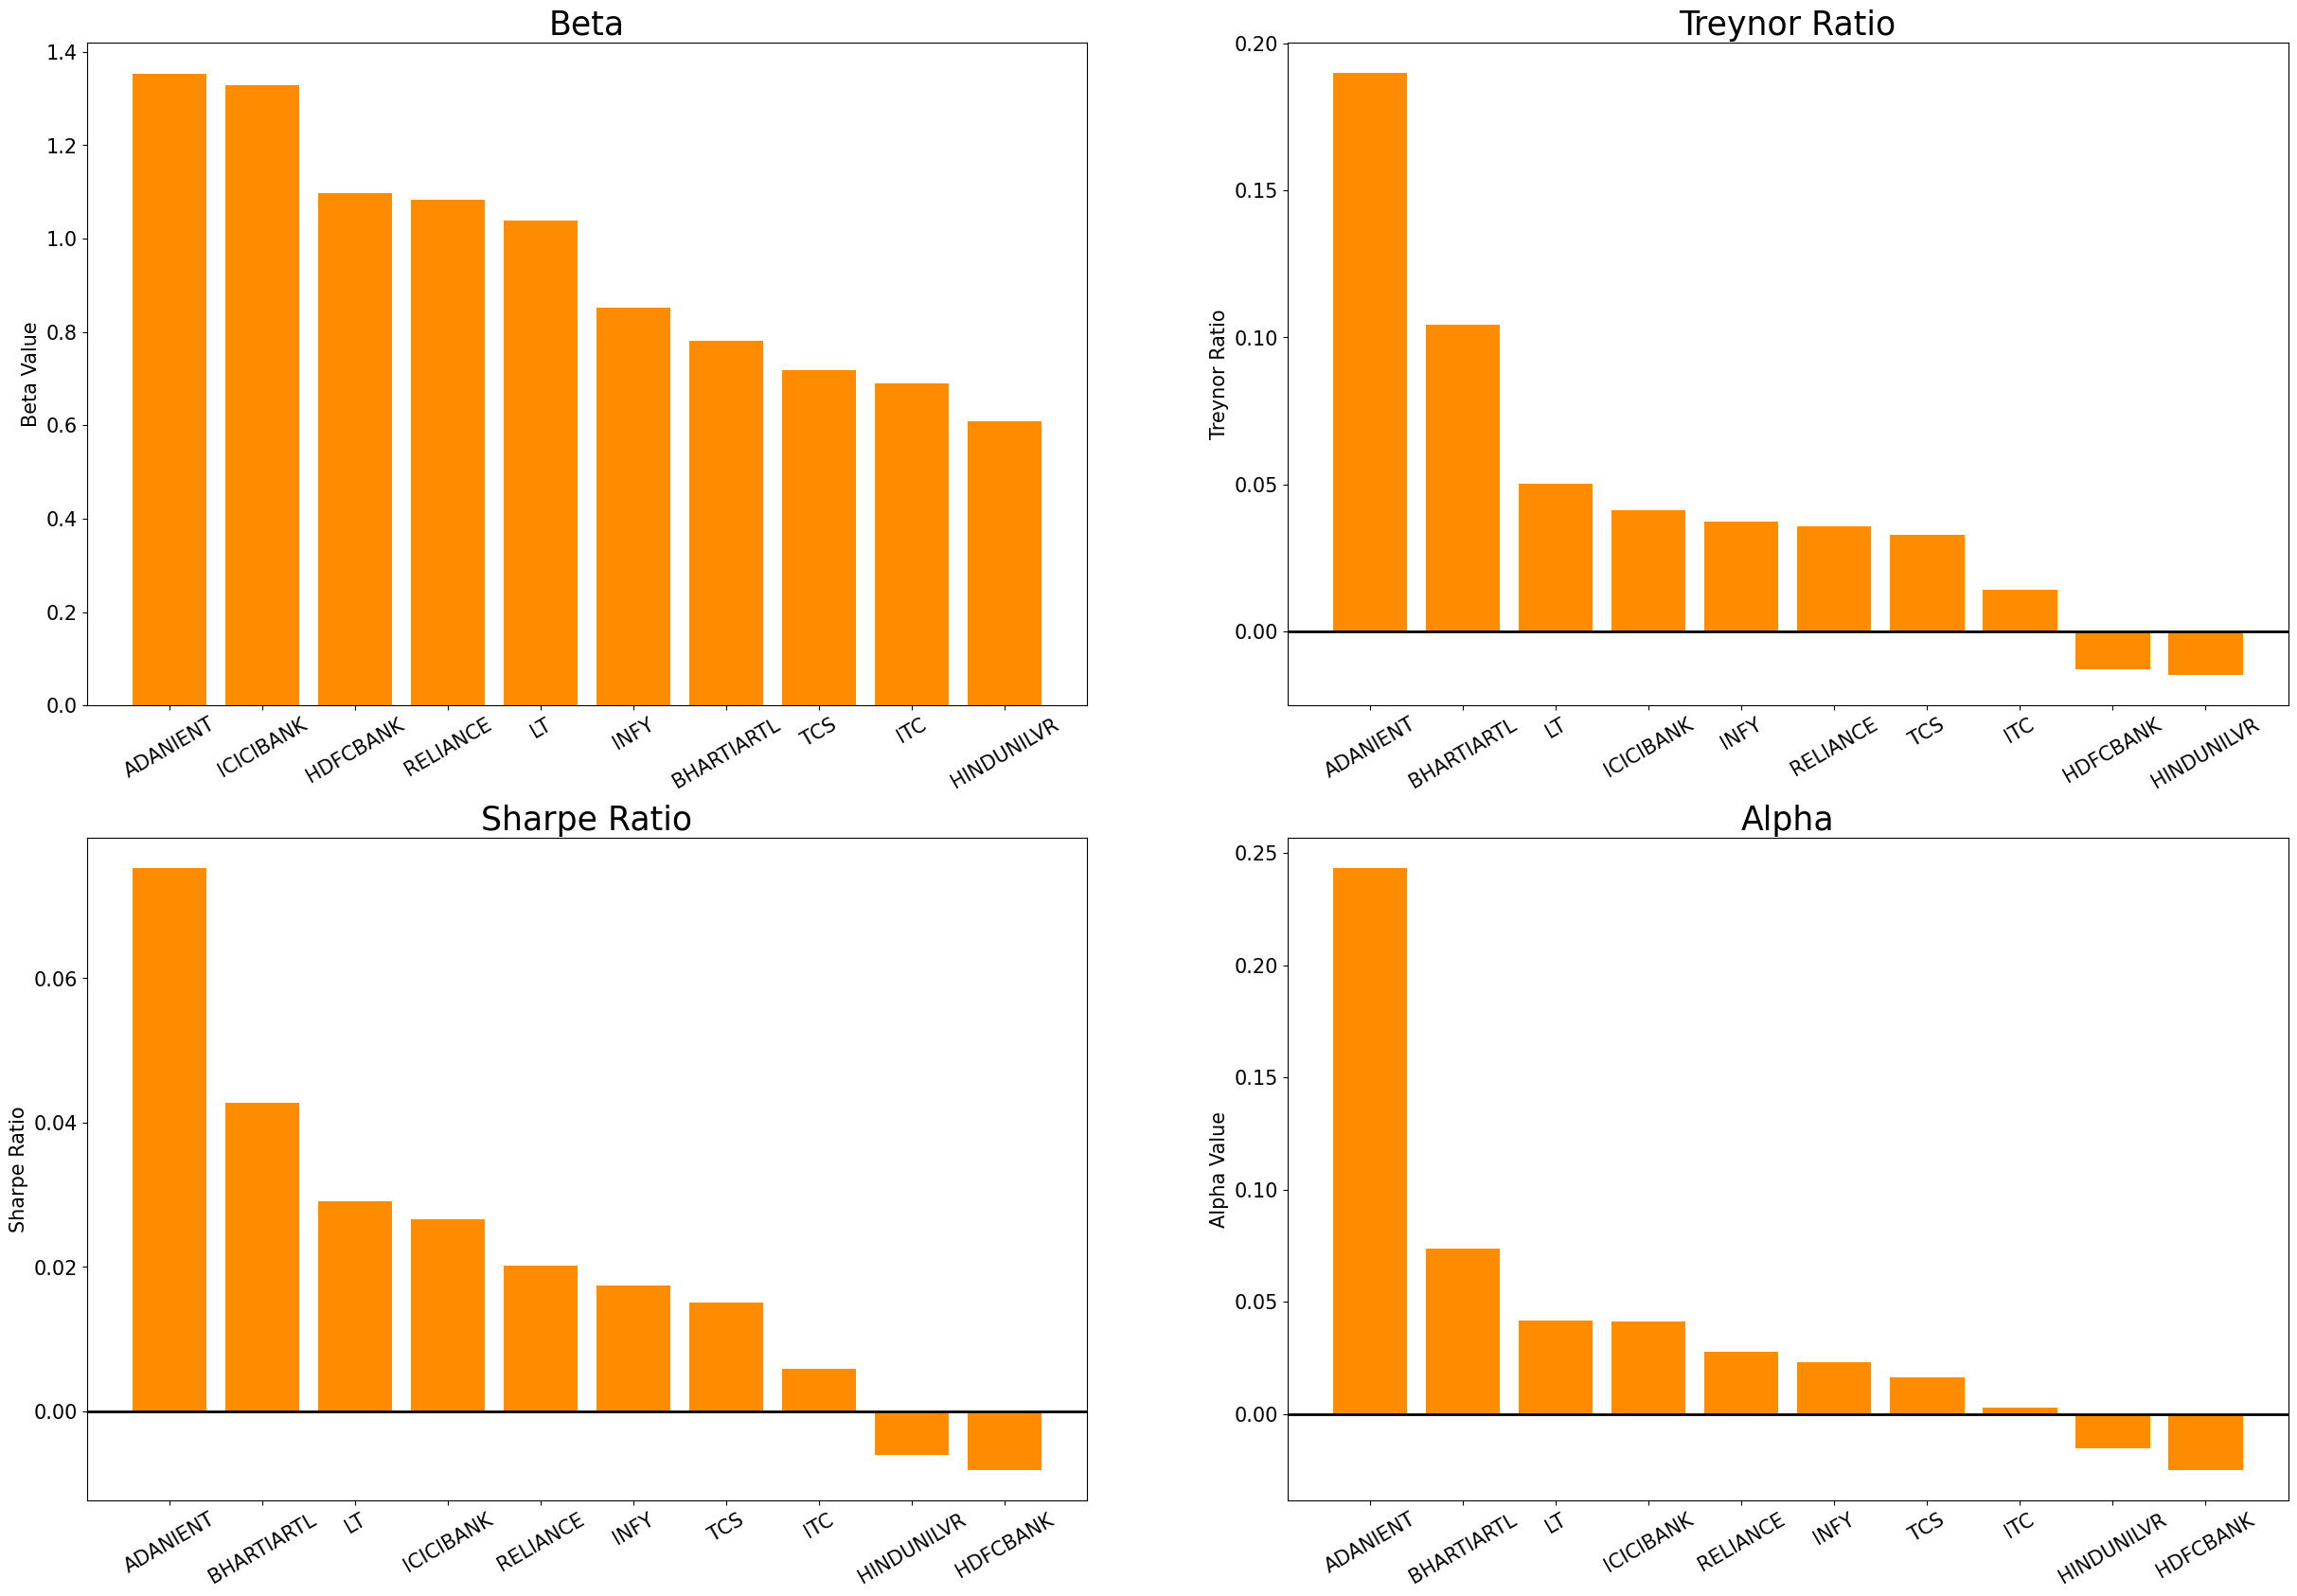

In [53]:
plt.figure(figsize=(30, 20))

plt.subplot(2,2,1)
plt.bar(beta_data.index, beta_data, color='Darkorange')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Beta Value', fontsize=15)
plt.title('Beta', fontsize=25)
plt.xticks(rotation=30)

plt.subplot(2,2,2)
plt.bar(treynor_ratio_data.index, treynor_ratio_data, color='Darkorange')
plt.axhline(y=0, color='black', linestyle='-', linewidth=2)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Treynor Ratio', fontsize=15)
plt.title('Treynor Ratio', fontsize=25)
plt.xticks(rotation=30)

plt.subplot(2,2,3)
plt.bar(sharpe_ratio_data.index, sharpe_ratio_data, color='Darkorange')
plt.axhline(y=0, color='black', linestyle='-', linewidth=2)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Sharpe Ratio', fontsize=15)
plt.title('Sharpe Ratio', fontsize=25)
plt.xticks(rotation=30)

plt.subplot(2,2,4)
plt.bar(alpha_data.index, alpha_data, color='Darkorange')
plt.axhline(y=0, color='black', linestyle='-', linewidth=2)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Alpha Value', fontsize=15)
plt.title('Alpha', fontsize=25)
plt.xticks(rotation=30)

plt.show()

## Setting up Data for Simulation

In [54]:
ticker_list = [HDFCBANK, ICICIBANK, TCS, INFY, HINDUNILVR, ITC, RELIANCE, LT, ADANIENT, BHARTIARTL]
symbols = ['HDFCBANK', 'ICICIBANK', 'TCS', 'INFY', 'HINDUNILVR', 'ITC', 'RELIANCE', 'LT', 'ADANIENT', 'BHARTIARTL']

dfs = []

start_date = '2017-04-01'

for itr, ticker_data in enumerate(ticker_list):
    ticker_data['Symbol'] = symbols[itr]
    ticker_data.reset_index(inplace=True)
    dfs.append(ticker_data)

stock_data = pd.concat(dfs, ignore_index=True)
stock_data

,Date,Open,High,Low,Close,Adj Close,Volume,Return,Symbol
0,2019-04-01,1162.625000,1166.000000,1152.300049,1155.900024,1100.336182,4823538,NaN,HDFCBANK
1,2019-04-02,1160.000000,1160.000000,1142.724976,1147.425049,1092.268555,5455248,-0.733197,HDFCBANK
2,2019-04-03,1146.050049,1158.000000,1144.125000,1146.375000,1091.269043,3829726,-0.091508,HDFCBANK
3,2019-04-04,1146.375000,1156.500000,1140.000000,1141.974976,1087.080566,4605776,-0.383817,HDFCBANK
4,2019-04-05,1143.900024,1156.875000,1141.000000,1152.800049,1097.385254,4175590,0.947923,HDFCBANK
...,...,...,...,...,...,...,...,...,...
12345,2024-03-21,1238.000000,1242.900024,1214.099976,1220.800049,1220.800049,9952250,-0.893002,BHARTIARTL
12346,2024-03-22,1226.949951,1245.000000,1222.000000,1236.099976,1236.099976,7840007,1.253270,BHARTIARTL
12347,2024-03-26,1225.000000,1234.000000,1210.000000,1213.099976,1213.099976,10898138,-1.860691,BHARTIARTL
12348,2024-03-27,1210.550049,1228.250000,1210.550049,1224.800049,1224.800049,5779169,0.964477,BHARTIARTL


In [55]:
symbol_order = stock_data['Symbol'].unique()
price_data = stock_data.pivot(index='Date', columns='Symbol', values='Return')[symbol_order]

In [56]:
display(price_data)

Symbol,HDFCBANK,ICICIBANK,TCS,INFY,HINDUNILVR,ITC,RELIANCE,LT,ADANIENT,BHARTIARTL
Date,,,,,,,,,,
2019-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-02,-0.733197,-0.276207,2.345392,0.569470,-0.168636,0.218653,-0.154479,-0.173457,0.132047,4.592147
2019-04-03,-0.091508,-1.271571,0.000000,-0.803266,-0.969102,-0.587439,-1.043385,-2.248640,-2.703594,-1.809515
2019-04-04,-0.383817,-0.854373,-3.116428,-0.716838,-0.254366,-0.455861,-1.610668,-0.678501,-0.033887,1.942854
2019-04-05,0.947923,0.463016,1.677820,1.524252,-0.447039,-0.084789,0.062814,0.372627,-0.406792,-0.042027
...,...,...,...,...,...,...,...,...,...,...
2024-03-21,1.027208,-0.248958,0.051630,-0.016078,0.017848,1.335094,0.500431,1.433172,0.493210,-0.893002
2024-03-22,-0.200590,0.785727,-1.561813,-2.949121,0.633262,1.744809,0.279126,1.623597,1.343550,1.253270
2024-03-26,-1.209406,-0.605347,-0.854022,-1.073662,-0.733423,-0.221655,-0.924388,1.445631,0.072401,-1.860691


Text(0.5, 36.72222222222221, '')

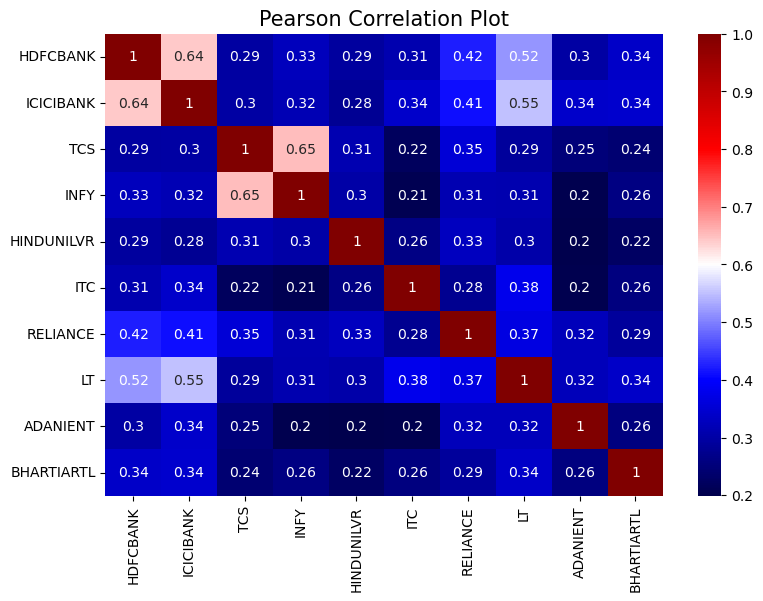

In [57]:
plt.figure(figsize=(9,6))

sns.heatmap(price_data.corr(), annot=True, cmap='seismic')
plt.title('Pearson Correlation Plot', fontsize=15)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.ylabel('')
plt.xlabel('')

* None of the Stocks have high correlation with each other which suggests our stocks choice is good

## Sharpe Ratio Calculation
The Sharpe ratio compares the return of an investment with its risk. It's a mathematical expression of the insight that excess returns over a period of time may signify more volatility and risk, rather than investing skill.

$$  Sharpe Ratio =  \frac {Rp - Rf} {\sigma p}   $$

Where: 
* Rp = Return of Portfolio (expected)
* Rf = Risk-Free Rate
* $\sigma$p = Standard Deviation of the Portfolio’s Excess Return


$$$$

**Expected Return:**
<div style="text-align: center;">
  \( R_p = ( w_{1}r_{1} + w_{2}r_{2} + \ldots +  w_{n}r_{n} ) \)
</div>

Where:
* $r_i$ = Return of Security i
* $w_i$ = Weight of Security i

$$$$

**Standard Deviation of the Portfolio**
$$ \sigma_p = \sqrt{\sum{(w_i^2 \cdot \sigma_i^2) + (w_j^2 \cdot \sigma_j^2)} + 2 \sum{(w_i \cdot w_j \cdot \rho_{ij} \cdot \sigma_i \cdot \sigma_j)}}
$$

Where:

- w<sub>i</sub> is the weight of asset `i` in the portfolio.
- $\sigma_i$ is the standard deviation of asset `i`.
- $\rho_{ij}$ is the correlation coefficient between assets `i` and `j`.
- The first summation term calculates the contribution of each asset's risk to the portfolio.
- The second summation term considers the covariance between asset pairs `i` and `j` and their weights.


## Portfolio Optimization Process

In [58]:
beta_values = pd.Series([HDFCBANK_beta, ICICIBANK_beta, TCS_beta, INFY_beta, HINDUNILVR_beta, 
                      ITC_beta, RELIANCE_beta, LT_beta, ADANIENT_beta, BHARTIARTL_beta], 
                     index=['HDFCBANK', 'ICICIBANK', 'TCS', 'INFY', 'HINDUNILVR', 
                            'ITC', 'RELIANCE', 'LT', 'ADANIENT', 'BHARTIARTL'])

market_return = NSE['Return'].mean()

### Monte Carlo Simulation

In [59]:
num_portfolios = 100000

results = np.zeros((num_portfolios, 4 + len(price_data.columns)))  # Mean return, Volatility, Treynor Ratio, Sharpe Ratio, Portfolio Weights

for i in range(num_portfolios):
    
    weights = np.random.random(len(price_data.columns))    # Generate random portfolio weights
    weights /= np.sum(weights)                                # Normalize weights

    # portfolio statistics
    portfolio_return = np.sum(price_data.mean() * weights) * 252
    portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(price_data.cov() * 252, weights)))
    portfolio_beta = np.sum(beta_values * weights) * 252
    portfolio_alpha = portfolio_return - (risk_free_rate + portfolio_beta * (market_return - risk_free_rate))
    treynor_ratio =(portfolio_return - risk_free_rate) / portfolio_beta
    sharpe_ratio = (portfolio_return - risk_free_rate) / portfolio_std_dev
    
    

    # results
    results[i, :4] = [portfolio_return, portfolio_std_dev, treynor_ratio, sharpe_ratio]
    results[i, 4:] = weights

columns = ['Return', 'Volatility', 'Treynor Ratio', 'Sharpe Ratio'] + [stocks for stocks in price_data.columns]
results_df = pd.DataFrame(results, columns=columns)

max_treynor_portfolio = results_df.iloc[results_df['Treynor Ratio'].idxmax()]
max_sharpe_portfolio = results_df.iloc[results_df['Sharpe Ratio'].idxmax()]
min_volatility_portfolio = results_df.iloc[results_df['Volatility'].idxmin()]

In [60]:
results_df

,Return,Volatility,Treynor Ratio,Sharpe Ratio,HDFCBANK,ICICIBANK,TCS,INFY,HINDUNILVR,ITC,RELIANCE,LT,ADANIENT,BHARTIARTL
0,33.530592,23.374279,0.124766,1.432369,0.093047,0.216974,0.052658,0.105396,0.133597,0.019384,0.003885,0.086768,0.232344,0.055945
1,33.567483,22.513780,0.139017,1.488754,0.079212,0.011152,0.151479,0.219454,0.046923,0.114077,0.002657,0.057198,0.247892,0.069957
2,20.960961,18.518629,0.090982,1.129185,0.127703,0.087491,0.080141,0.023134,0.106181,0.196351,0.055277,0.203154,0.023179,0.097389
3,29.072617,21.826253,0.111819,1.329711,0.152388,0.207113,0.094275,0.024703,0.179039,0.036106,0.047026,0.025265,0.183763,0.050323
4,23.456320,18.763509,0.099899,1.247438,0.072218,0.046466,0.138756,0.029990,0.138630,0.084573,0.187622,0.176965,0.063490,0.061289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,31.525627,21.467285,0.124521,1.466214,0.018495,0.085428,0.152925,0.003804,0.065952,0.094485,0.147735,0.198462,0.180364,0.052350
99996,25.230256,19.066040,0.107455,1.320686,0.142056,0.086087,0.142971,0.104621,0.132132,0.040298,0.071102,0.032838,0.096039,0.151854
99997,28.191110,20.488989,0.120490,1.373475,0.008114,0.018275,0.140704,0.177020,0.161839,0.034246,0.226117,0.026513,0.149258,0.057914
99998,26.790881,20.272081,0.107665,1.319099,0.007804,0.182226,0.137031,0.124242,0.002371,0.207875,0.093973,0.137649,0.101210,0.005619


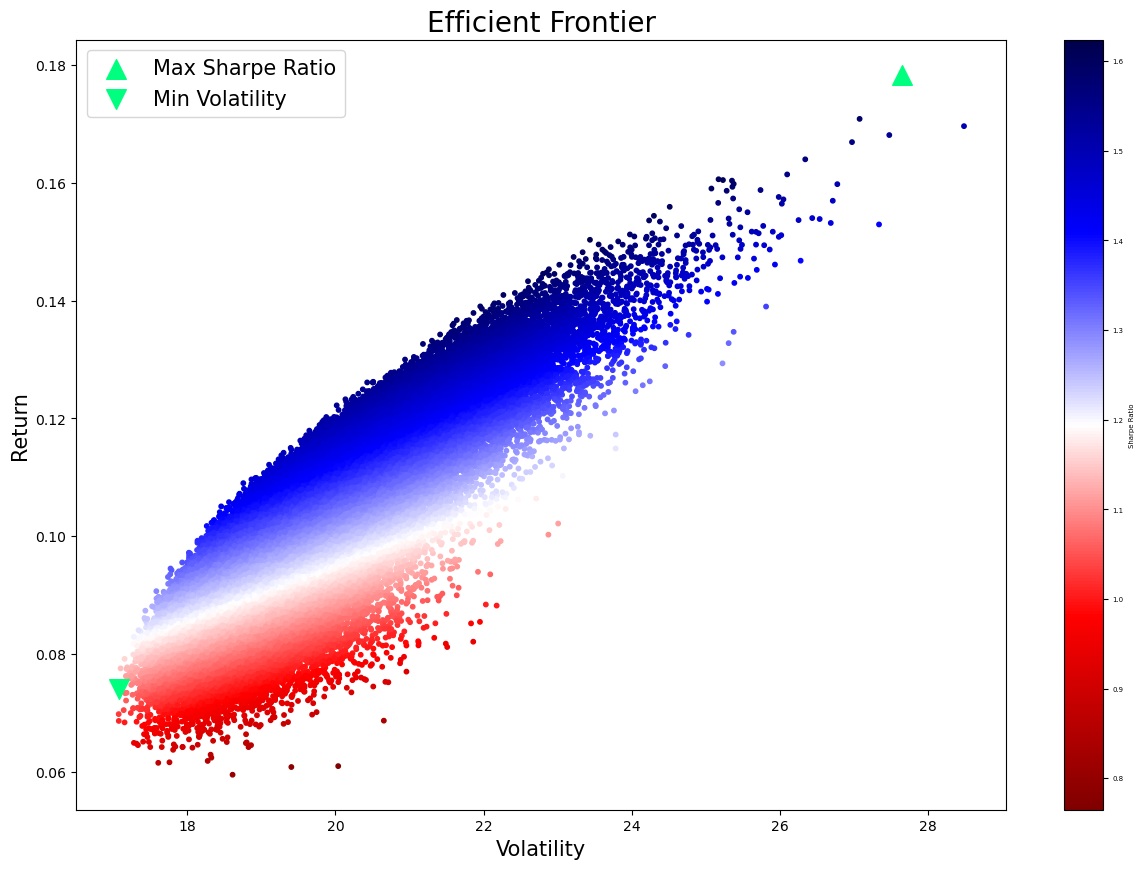

In [83]:
plt.figure(figsize=(15,10))

plt.scatter(results_df['Volatility'], results_df['Return']/252, c=results_df['Sharpe Ratio'], 
            cmap='seismic_r', marker='o', s=10)
plt.colorbar(label='Sharpe Ratio')


plt.scatter(max_sharpe_portfolio['Volatility'], max_sharpe_portfolio['Return']/252, 
            marker='^', color='springgreen', s=200, label='Max Sharpe Ratio')

plt.scatter(min_volatility_portfolio['Volatility'], min_volatility_portfolio['Return']/252, 
            marker='v', color='springgreen', s=200, label='Min Volatility')

plt.xlabel('Volatility', fontsize=15)
plt.ylabel('Return', fontsize=15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=15)
plt.title('Efficient Frontier', fontsize=20)
plt.show()

In [62]:
max_sharpe_portfolio 

Return           44.933048
Volatility       27.638714
Treynor Ratio     0.165763
Sharpe Ratio      1.623920
HDFCBANK          0.000579
ICICIBANK         0.139141
TCS               0.077102
INFY              0.000286
HINDUNILVR        0.018715
ITC               0.005810
RELIANCE          0.046452
LT                0.054135
ADANIENT          0.346341
BHARTIARTL        0.311440
Name: 28295, dtype: float64

In [63]:
max_treynor_portfolio 

Return           44.933048
Volatility       27.638714
Treynor Ratio     0.165763
Sharpe Ratio      1.623920
HDFCBANK          0.000579
ICICIBANK         0.139141
TCS               0.077102
INFY              0.000286
HINDUNILVR        0.018715
ITC               0.005810
RELIANCE          0.046452
LT                0.054135
ADANIENT          0.346341
BHARTIARTL        0.311440
Name: 28295, dtype: float64

In [64]:
min_volatility_portfolio

Return           18.689019
Volatility       17.074429
Treynor Ratio     0.094630
Sharpe Ratio      1.091633
HDFCBANK          0.062348
ICICIBANK         0.045401
TCS               0.238090
INFY              0.003524
HINDUNILVR        0.271305
ITC               0.171696
RELIANCE          0.052116
LT                0.022449
ADANIENT          0.020464
BHARTIARTL        0.112605
Name: 4115, dtype: float64

## Risk Metrics

### 1. Max Sharpe Ratio Portfolio

In [75]:
max_sharpe_weights = max_sharpe_portfolio[4:]

portfolio_return = np.sum(price_data.mean() * max_sharpe_weights)
beta_portfolio = np.sum(beta_values*max_sharpe_weights)
alpha_portfolio = portfolio_return - (risk_free_rate + beta_portfolio * (NSE['Return'].mean() - risk_free_rate))


print('Portfolio Return: ', portfolio_return)
print('Sharpe Ratio: ', max_sharpe_portfolio[3])
print('Beta of Portfolio: ', beta_portfolio)
print('Alpha of Portfolio: ', alpha_portfolio)

Portfolio Return:  0.17830574769197918
Sharpe Ratio:  1.6239195575952694
Beta of Portfolio:  1.0744701837504391
Alpha of Portfolio:  0.11753252326188998


### 2. Max Treynor Ratio Portfolio

In [79]:
max_treynor_weights = max_treynor_portfolio[4:]

portfolio_return = np.sum(price_data.mean() * max_treynor_weights)
beta_portfolio = np.sum(beta_values*max_treynor_weights)
alpha_portfolio = portfolio_return - (risk_free_rate + beta_portfolio * (NSE['Return'].mean() - risk_free_rate))


print('Portfolio Return: ', portfolio_return)
print('Treynor Ratio: ', max_treynor_portfolio[2])
print('Beta of Portfolio: ', beta_portfolio)
print('Alpha of Portfolio: ', alpha_portfolio)

Portfolio Return:  0.17830574769197918
Treynor Ratio:  0.16576293850414972
Beta of Portfolio:  1.0744701837504391
Alpha of Portfolio:  0.11753252326188998


### 3. Min Volatility Portfolio

In [82]:
max_sharpe_weights = min_volatility_portfolio[4:]

portfolio_return = np.sum(price_data.mean() * max_sharpe_weights)
beta_portfolio = np.sum(beta_values*max_sharpe_weights)
treynor_portfolio = (portfolio_return-risk_free_rate)/ beta_portfolio
alpha_portfolio = portfolio_return - (risk_free_rate + beta_portfolio * (NSE['Return'].mean() - risk_free_rate))


print('Portfolio Return: ', portfolio_return)
print('Treynor Ratio: ', treynor_portfolio)
print('Alpha of Portfolio: ', alpha_portfolio)

Portfolio Return:  0.07416277206734104
Treynor Ratio:  0.03091384646668526
Alpha of Portfolio:  0.016325858621622044


# Final Results

In [68]:
amount = 10000

In [69]:
monte_carlo_amount_distribution = max_sharpe_weights * amount
monte_carlo_amount_distribution

HDFCBANK       623.484172
ICICIBANK      454.011516
TCS           2380.901646
INFY            35.244424
HINDUNILVR    2713.054067
ITC           1716.962920
RELIANCE       521.156540
LT             224.491723
ADANIENT       204.644006
BHARTIARTL    1126.048986
Name: 4115, dtype: float64

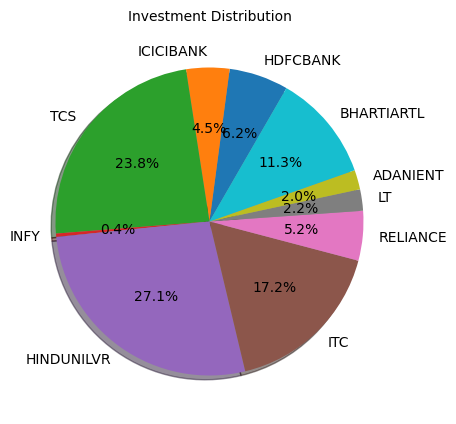

In [70]:
plt.figure(figsize=(5,5))

plt.pie(monte_carlo_amount_distribution.values, labels=monte_carlo_amount_distribution.index, 
        autopct='%1.1f%%', startangle=60, shadow=True)

plt.title('Investment Distribution',fontsize=10)
plt.rcParams['font.size'] = 5

plt.show()

## Convert to Pickle

In [71]:
import pickle

In [72]:
pickle.dump(max_sharpe_weights, open('final_allocation.pkl','wb'))

In [73]:
logo_list = ['HDFCBANK', 'ICICIBANK', 'TCS', 'INFY', 'HINDUNILVR', 'ITC', 'RELIANCE', 'LT', 'ADANIENT', 'BHARTIARTL']
pickle.dump(logo_list, open('logo_list.pkl','wb'))